# Disadvantages of k-mean

K-Means Clustering Algorithm has the following disadvantages- It requires to specify the number of clusters (k) in advance. It can not handle noisy data and outliers. It is not suitable to identify clusters with non-convex shapes

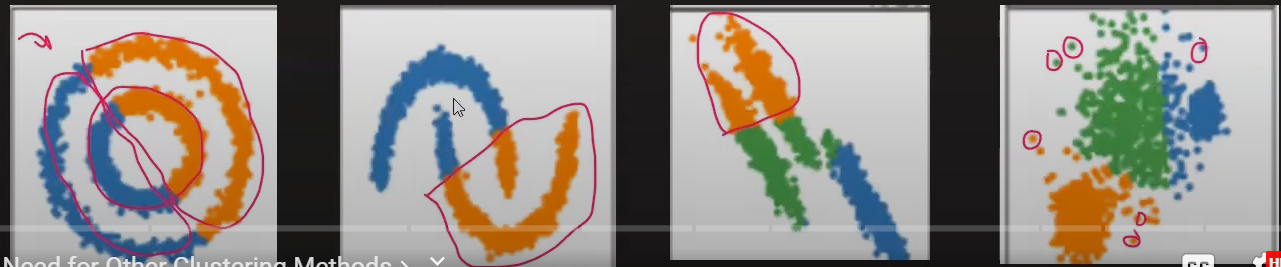

- probelm when the noise data comes it assign in some cluster as well 
- here cluster is not created properly

only it work very well in spherical or circular  data set

# Type of Hierachical Clustering


In [ ]:
1. Agglomerative Clustering
2. Divisive Clustering

### 1. Agglomerative Clustering
Step-1 : we assume that each point is cluster
from image the point 4,5 are so closed we can merged both point in one cluster and we will store the merging record



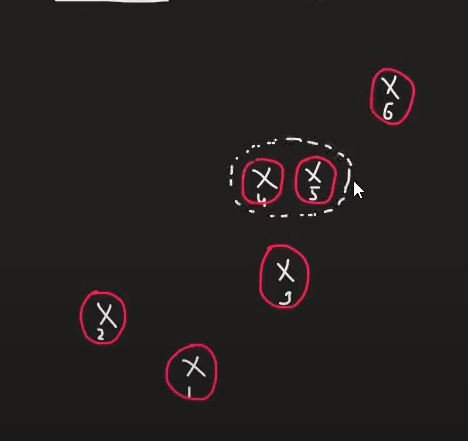
similary for the other data point
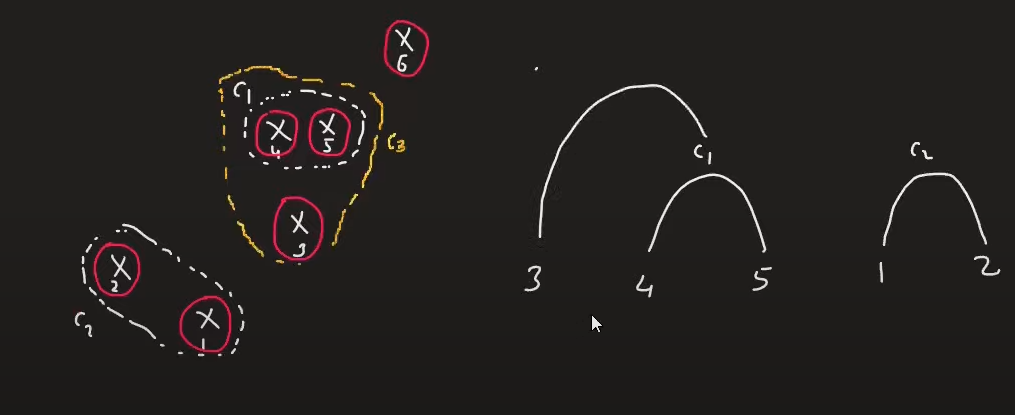
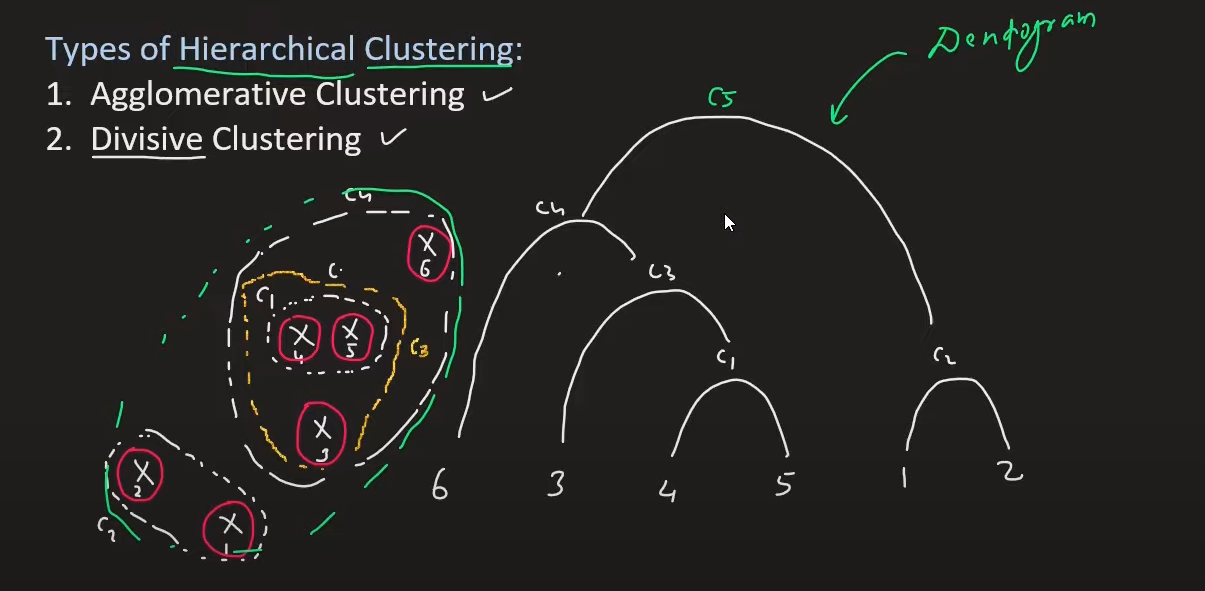

this hierachical is called as the denogram


if we want only two cluster the cut the dentigraph like this

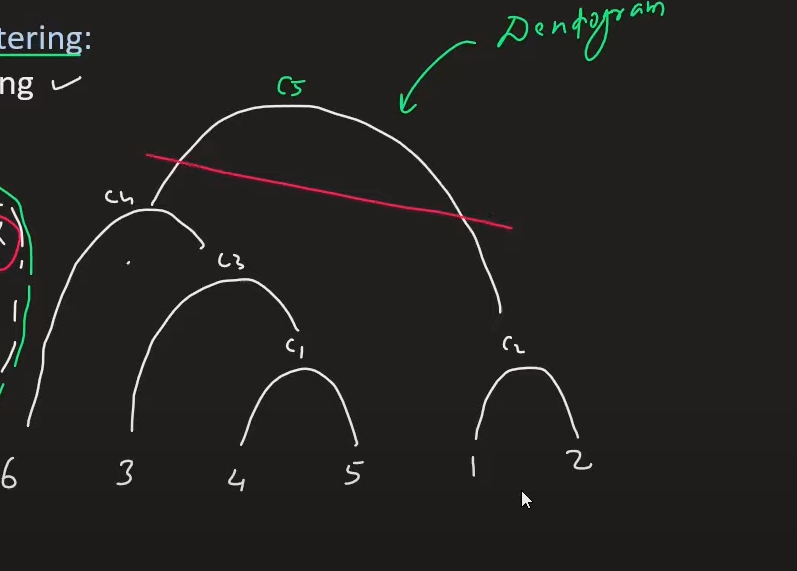

In [ ]:
Total cluster -1
if we want two cluster then make cut on dentogram
now cluster -1 : 6,3,4,5
    cluster -2 : 1,2

# How the agglomerative algorithms work:
   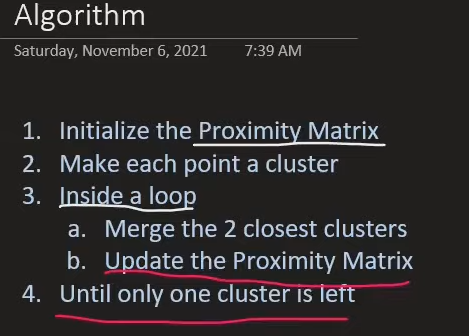

In [ ]:
step1: initializes the proximity matrix

    p1 p2 p3 p4
p1
p2
p3
p4

find the distance between the p1-p1, p1-p2, p1-p3, p1-p4
                              p2-p1, p2-p2, p2-p3, p2-p4 
                              similar to other point
those point has the less distance then it will be  merge in one cluster



so the  p3,p4 are closed the it merge in one cluster


then updated proximity  matrix
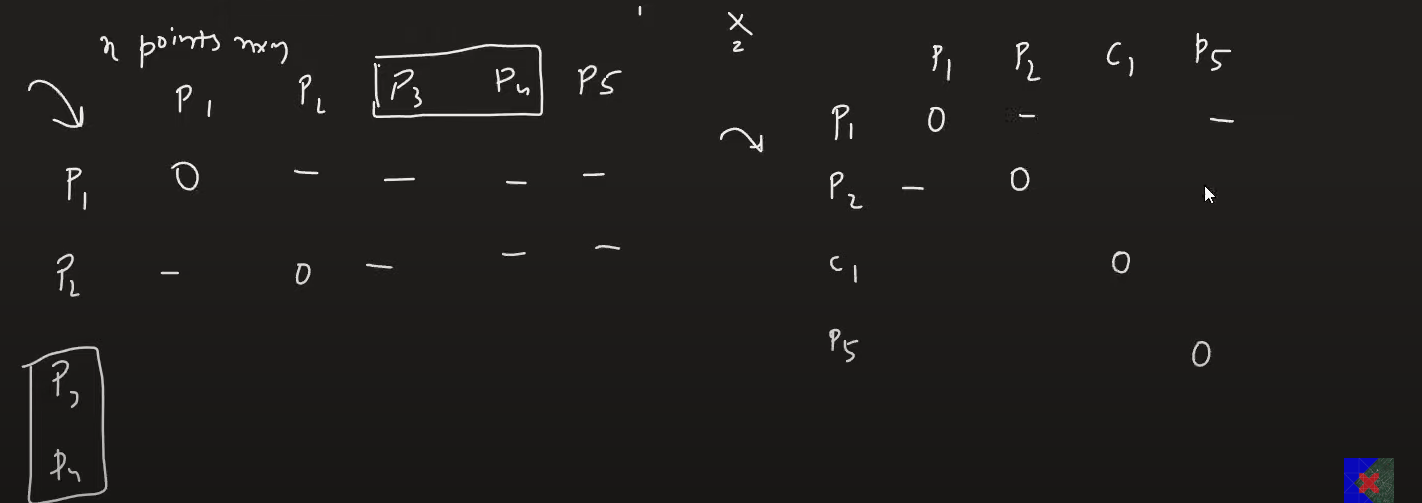

update proximity matrix again
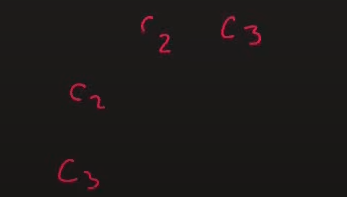

In [ ]:
now we need to calculate distance between this cluster 
c2,c3 (based on distance calcuation we choose the algorithms)



There 3 Way to cal distance
- 1.find the distance between the closed point of the the two cluster
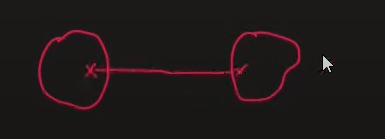
- 2 distance between longest data point
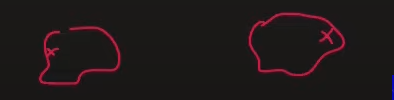
- 3 take the average of the data point from each cluster then find distance between the avg data point
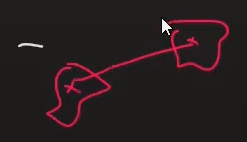

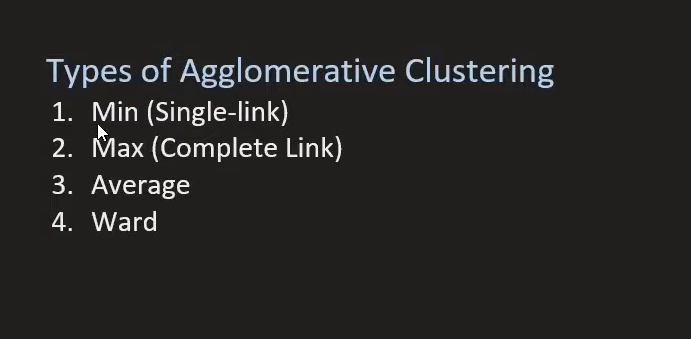

Single link do not work well on noise data
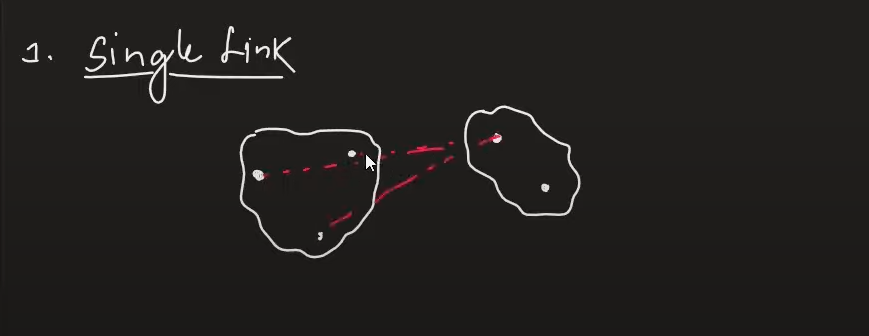

here total distance will be
3*2=6 distance 
- which is the shortest distance then this point will be in the same cluster
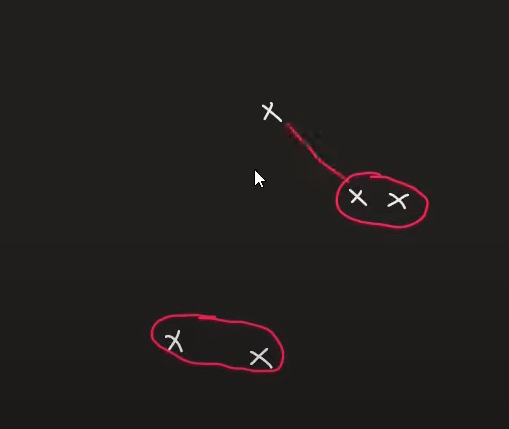

### based on max distance (well work on outliers)
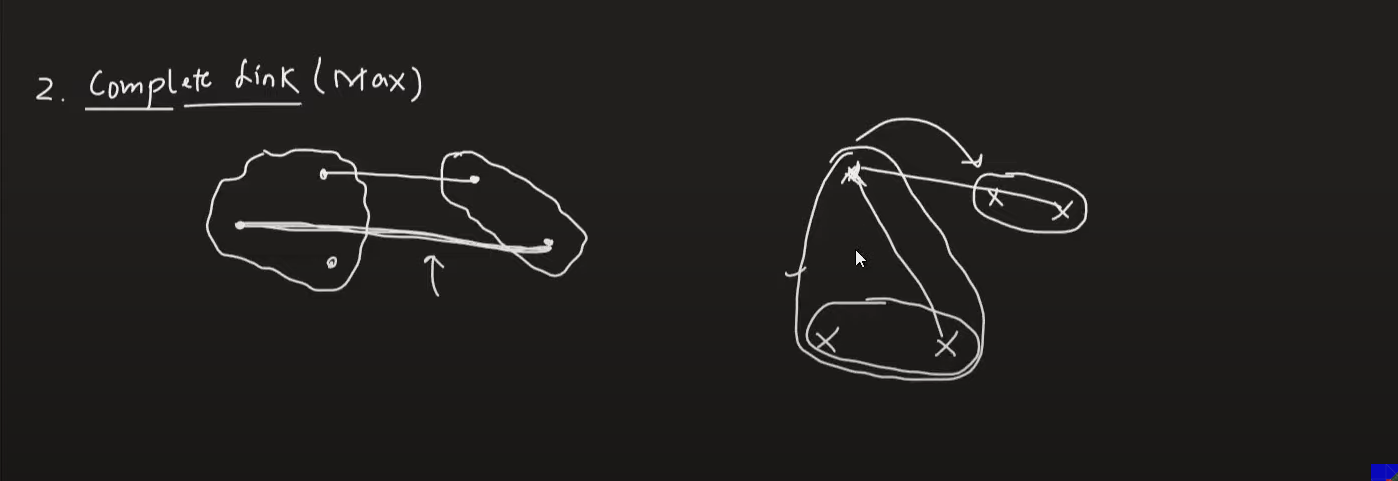

### disadvantages of complete link

because one small cluster the your big cluster getting break(blue color)
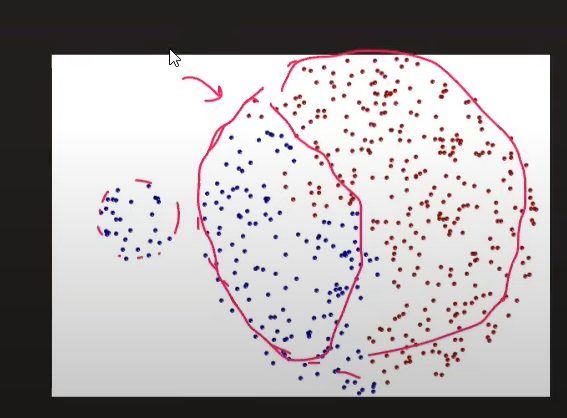

# Important
group and ward method find distance between min and max (mean overcome the problem of single link and complete link)


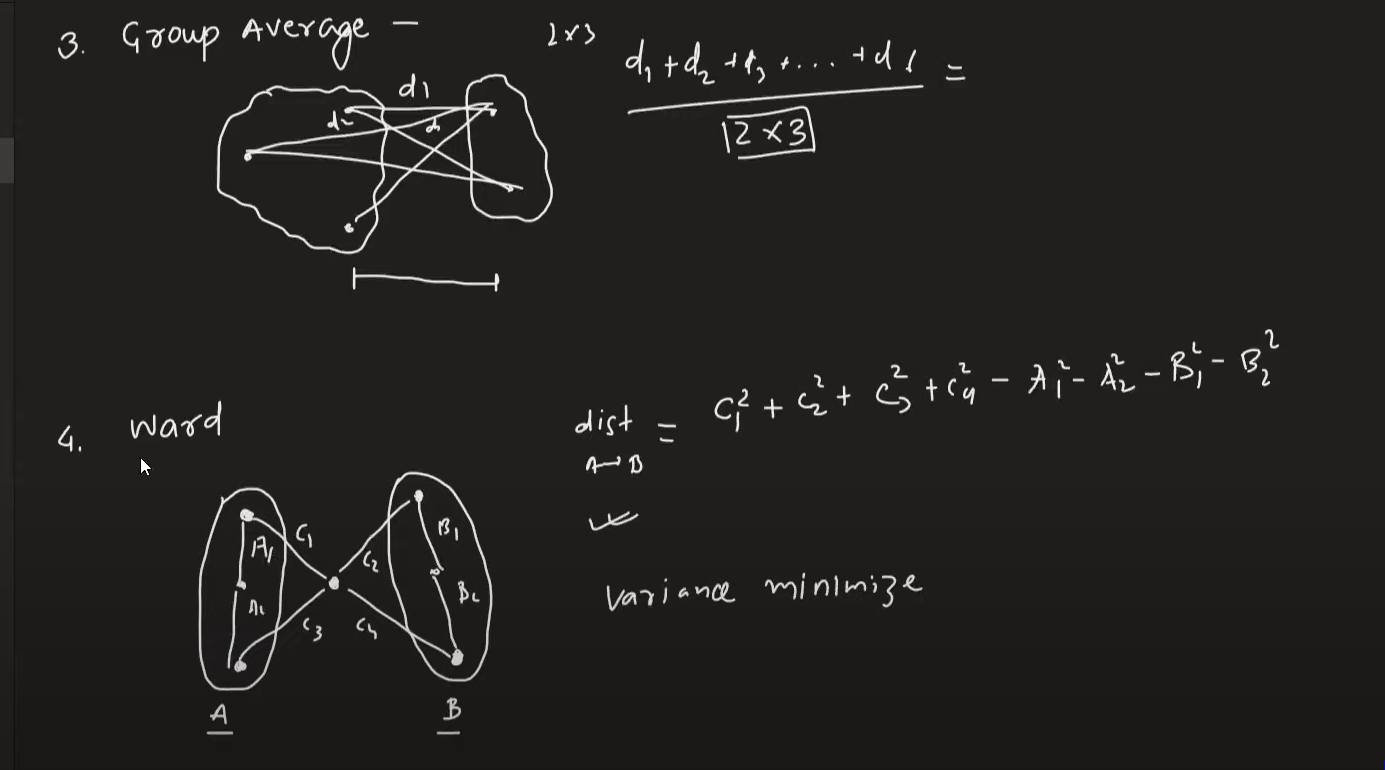

### In Group average 
- find 6 distance(3*2) 
- (d1+d2+d3+d4+d5+d6)/6
###  In Ward
- find the centroid between two cluster
- find distance between centroid and each data point cluster (c1,...c4)
- the find the average value from each cluster and the find the distance between the aver value and each point of it own cluster(A1,A2) AND (B1,B2)
- it help the to reduce the variance

## How to find the number of cluster

- plot dentogram
- find longest vertical line 
- and line shoud not be cut by horizantal line of other cluster

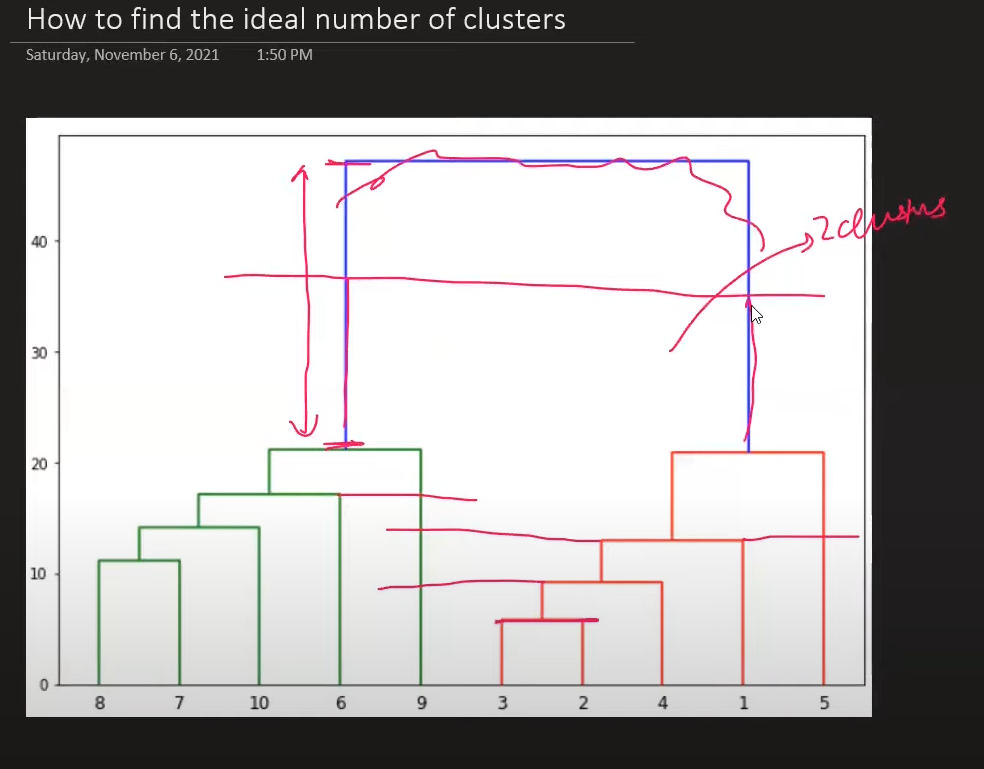

In [ ]:
in our case cluster from right to left 8-5  every cluster getting cut  by hoizantal 
but in top line not getting by any horizantal line

then we make the cut 
we have two cluster 
c1 = 8-9
c2 = 3-5

# Vertical line signify the inter-cluster similarity
- Find the longest vertical line and cut it

- from red cluster has the longest vertical line 
- total five cluster

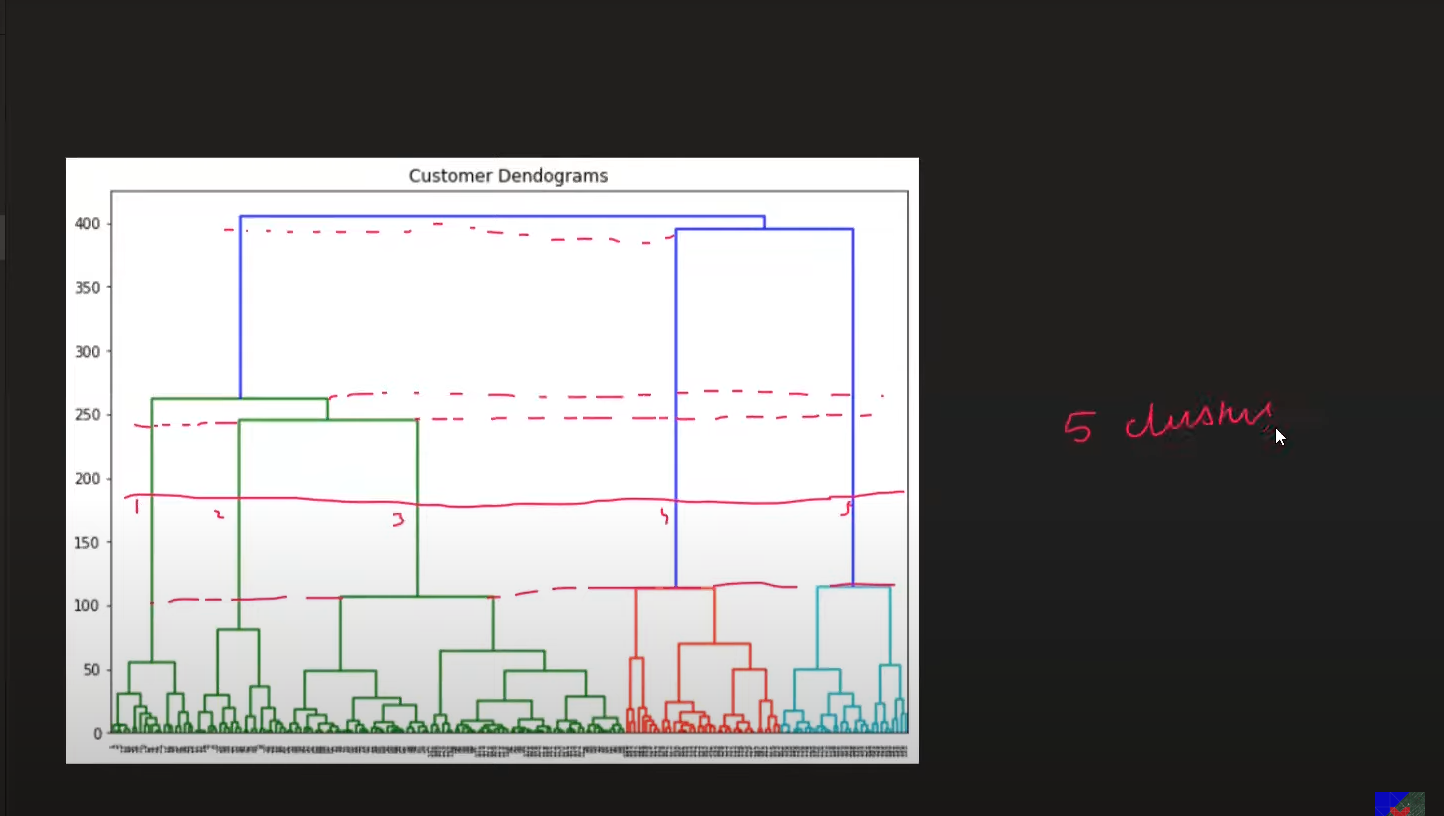

#important hyperparameter
- n_cluster
- affinity: 'euclidin'
- linkage:'ward'
- distance_threshold
  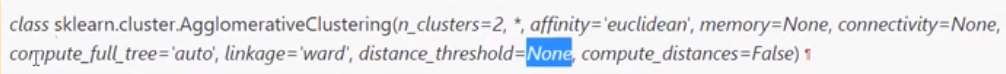





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv(r"D:\DATA\Farm_Data\old_farm_test_data\final_merged_data 1\final_merged_data.csv")
df = df[['x',	'y',	'z'	,'primary',	'secondary']]
df.shape

(361464, 5)

In [6]:
df[['x','y']]

,x,y
0,0.344777,-10.113470
1,0.498012,-8.964212
2,-0.229852,-9.577149
3,-1.608961,-9.232372
4,1.915430,-9.385606
...,...,...
361459,2.643293,-9.155755
361460,2.490059,-9.500532
361461,1.647270,-9.385606
361462,2.566676,-9.232372


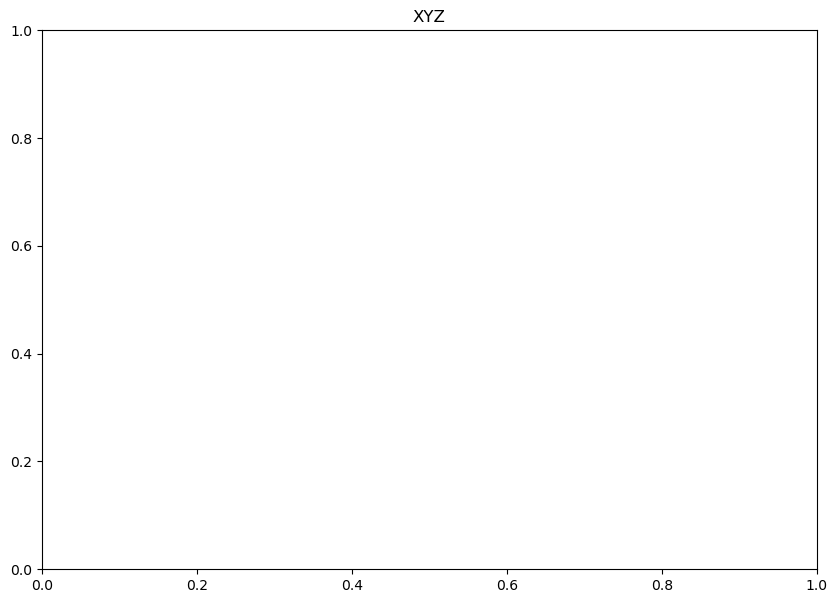

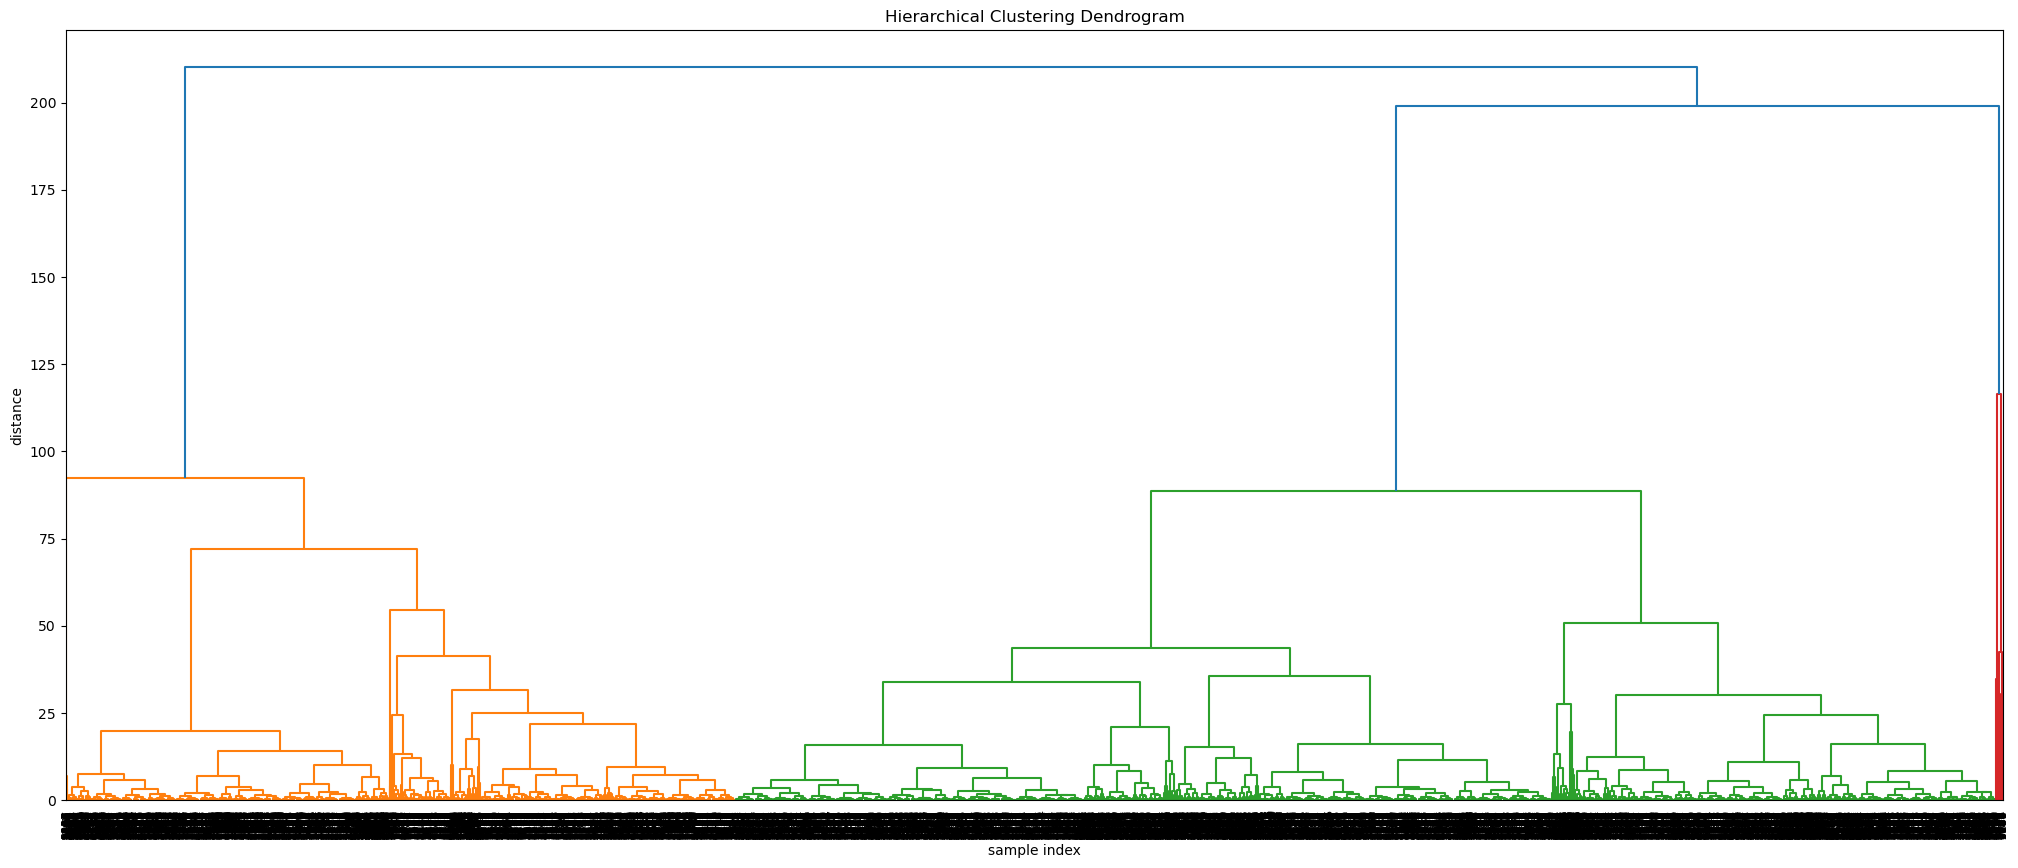

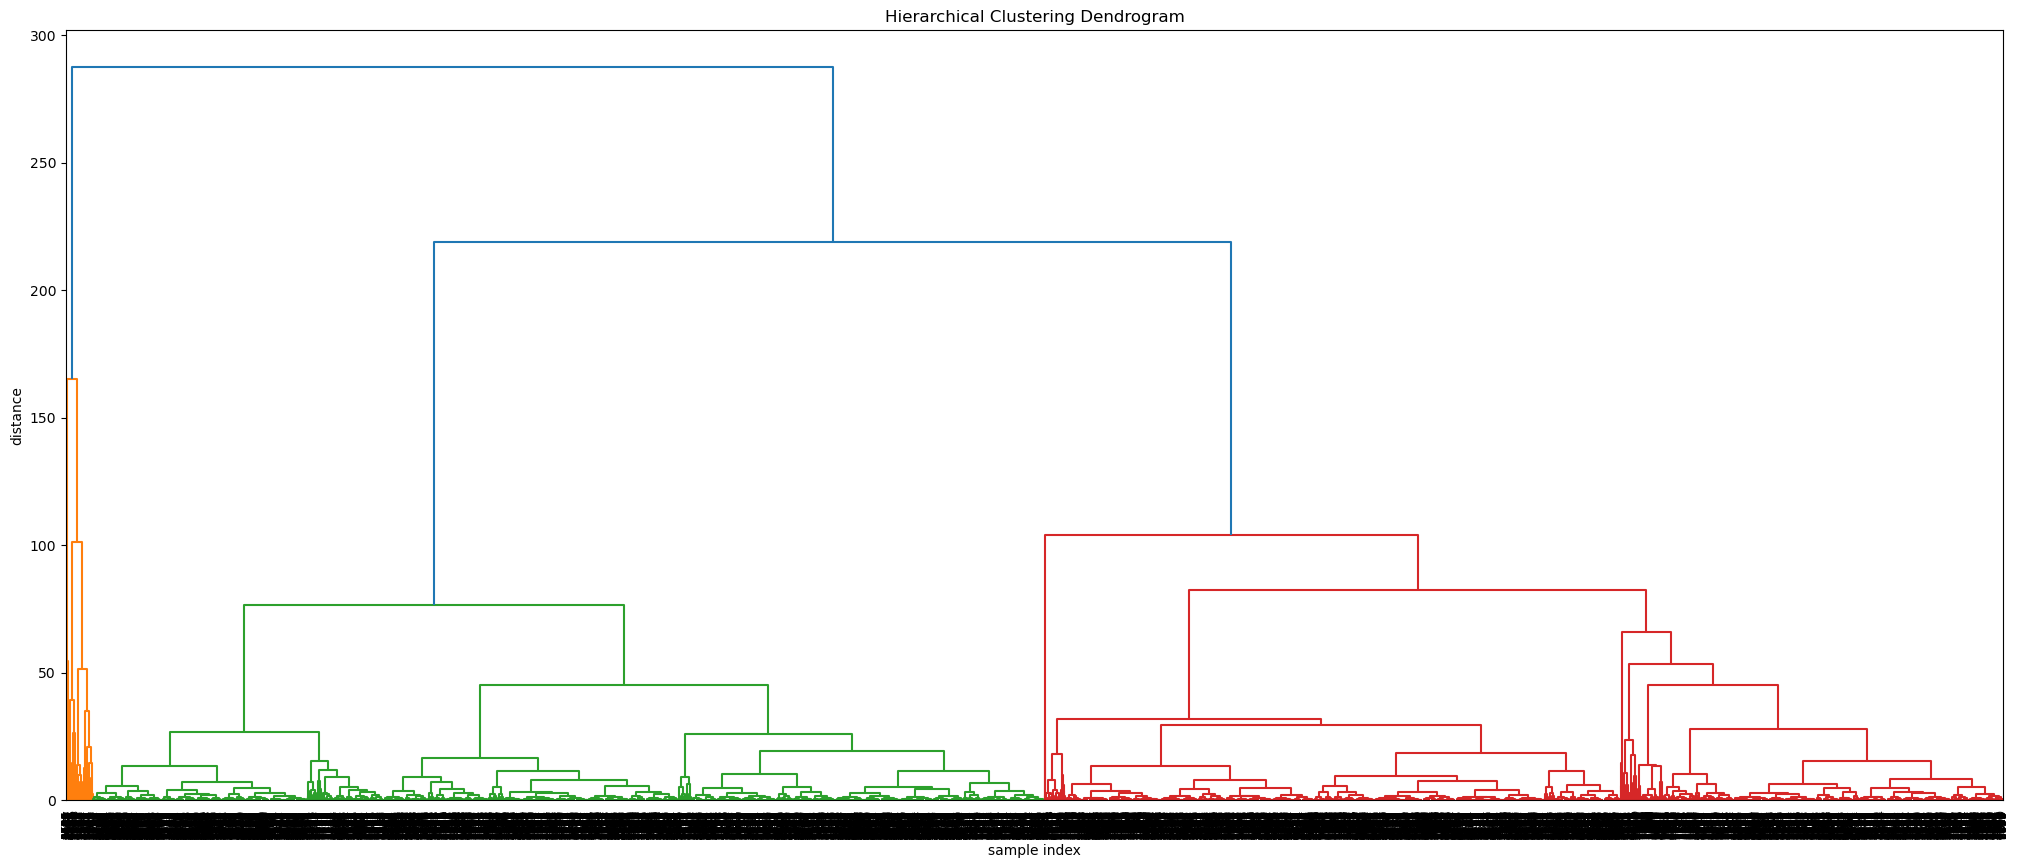

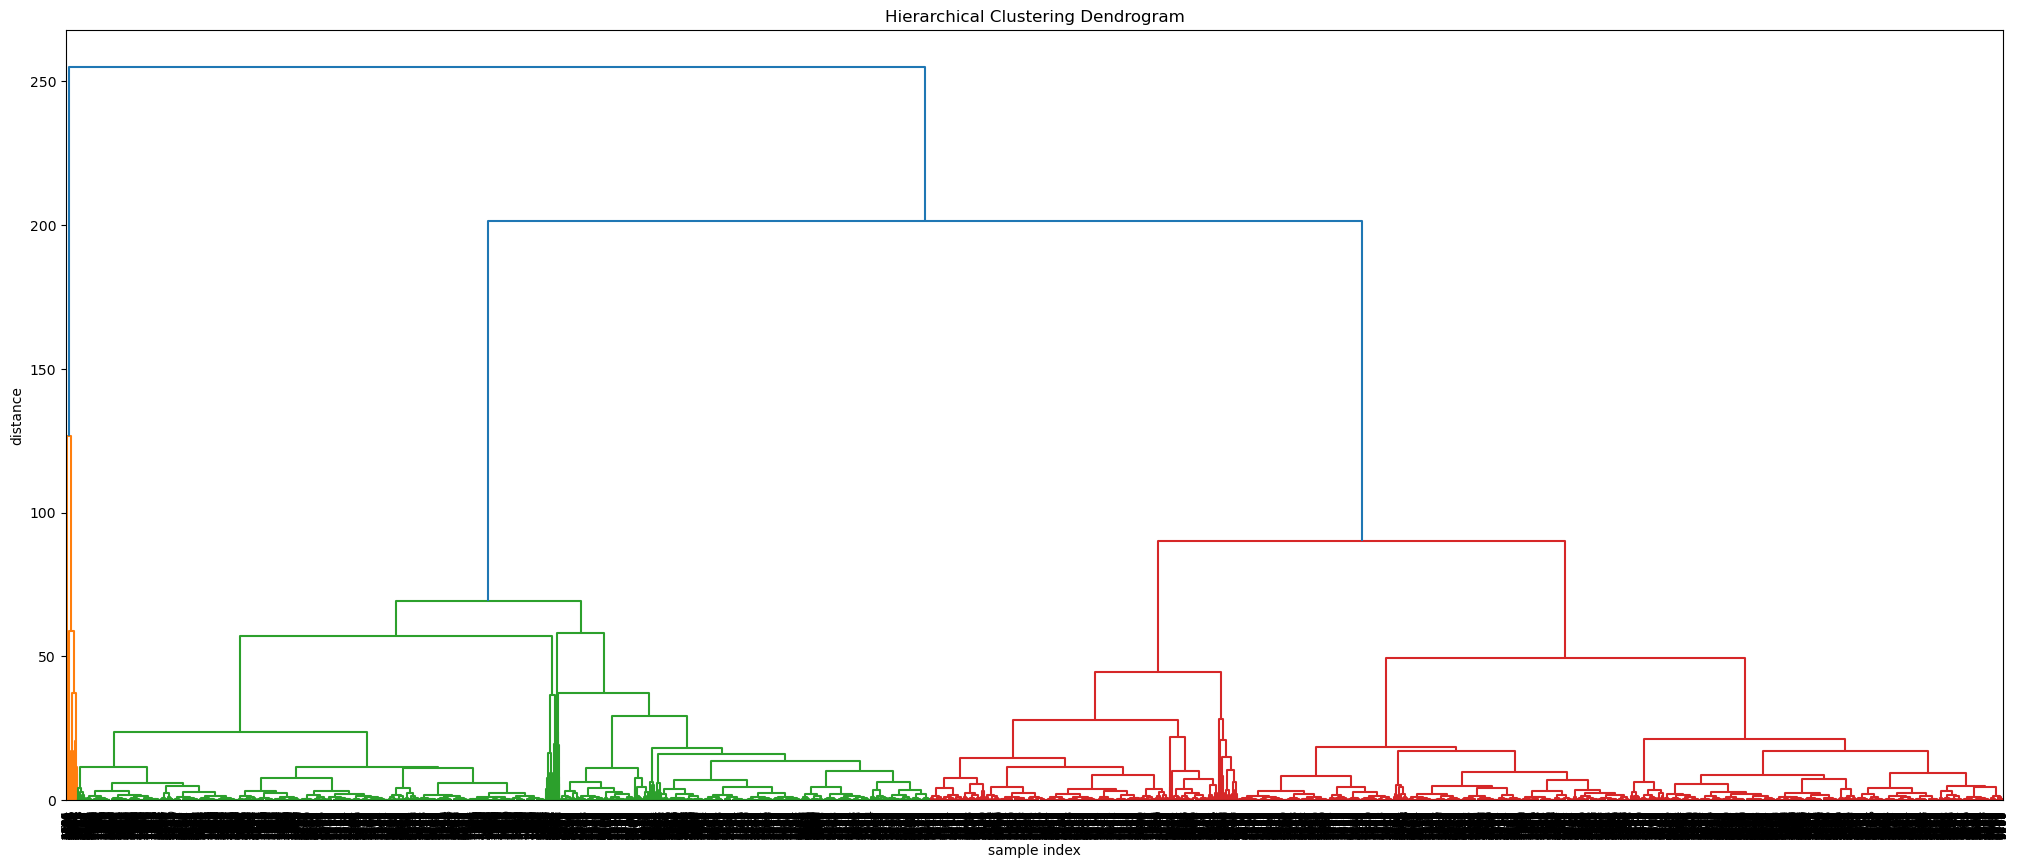

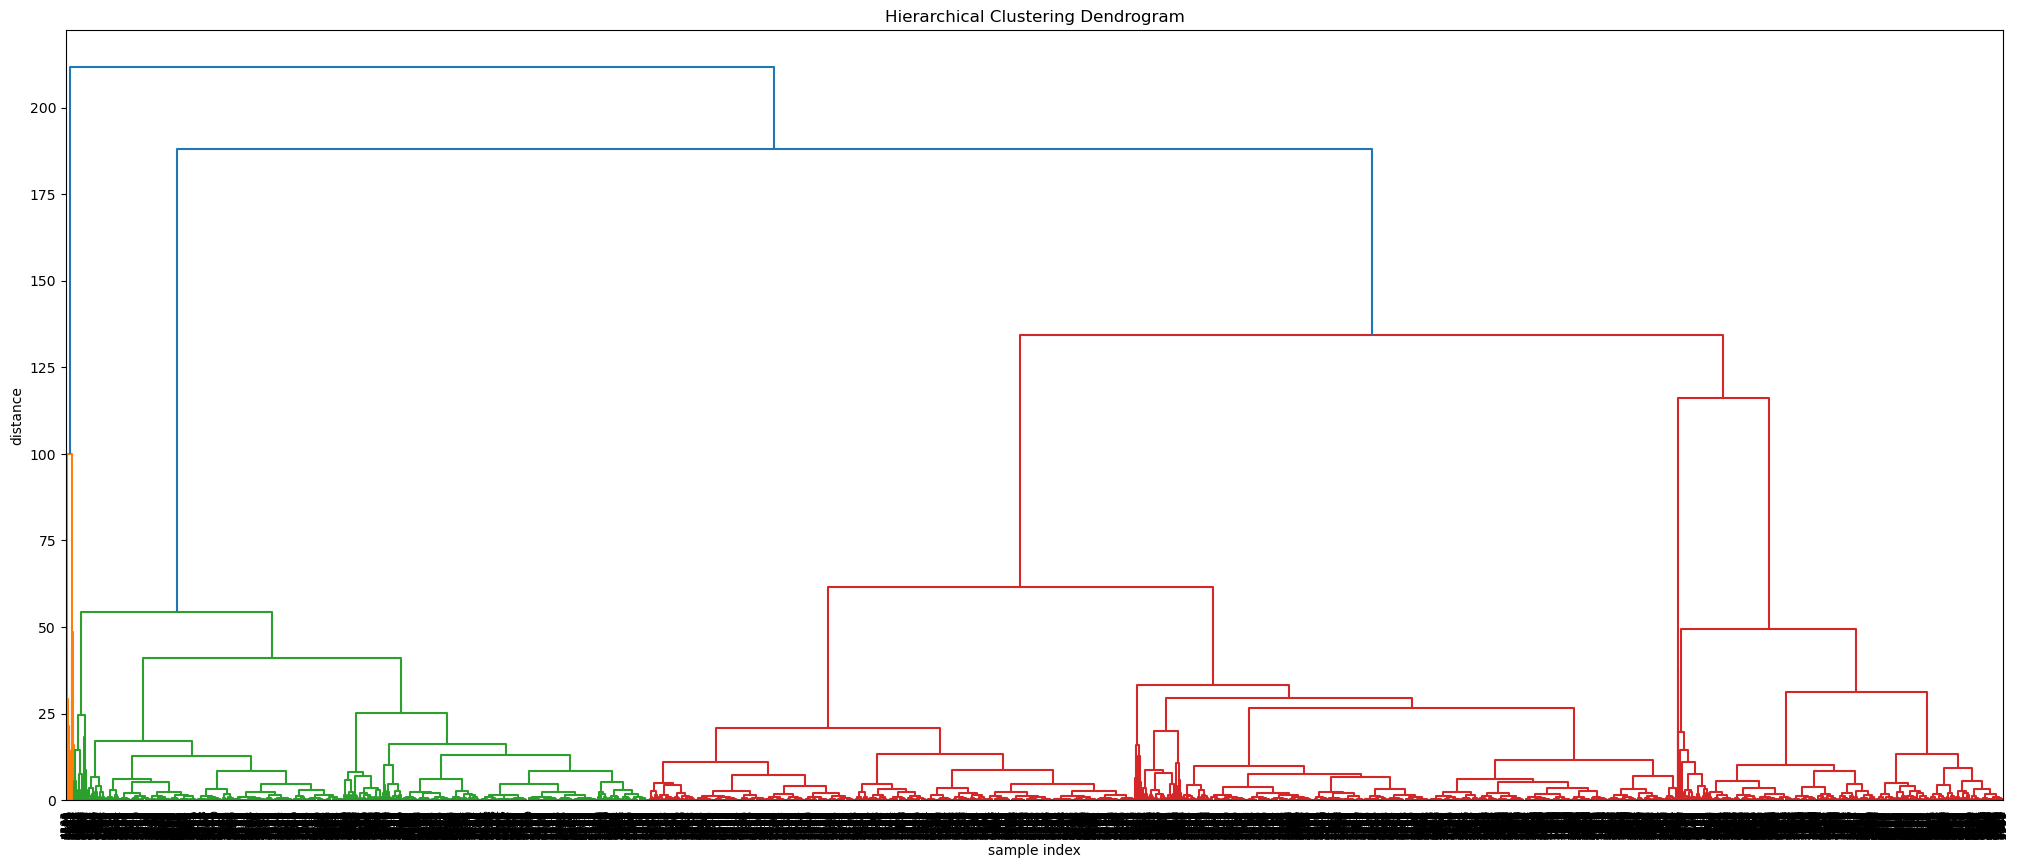

In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as shc  # to draw the dentogram
from sklearn.cluster import AgglomerativeClustering
# agg = AgglomerativeClustering(n_clusters=,affinity=linkage=)
label_cluster=agg.fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("XYZ")

file_path = r"D:\DATA\Farm_Data\old_farm_test_data\final_merged_data 1\final_merged_data.csv"
df_chunks = []
chunksize=10000
for df in pd.read_csv(file_path, chunksize=chunksize, iterator=True):
    Z = shc.linkage(df[['x','y']],method='ward')
    
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    shc.dendrogram(
        Z,
        leaf_rotation=90., # rotates the x axis labels
        leaf_font_size=8., # font size for the x axis labels
    )
    plt.show()
    df_chunks.append(df)
    master_df = pd.concat(df_chunks)

In [ ]:
#benifit of the agglomerativ
1.widely applicable
2.Dentogram : it gives the information which is closed point to other FloatingPointError


# limitation
we cannot use of big dataset : because we find the distance between datapoint by proximity matrix

suppose you have 10^6  then while finding distance it became 10^12 bytes